In [21]:
import sys
import os
import pandas as pd

sys.path.append(os.path.abspath(".."))

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from src.features.build_features import get_feature_lists, build_preprocessor
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv("../data/processed/data.csv")

X = df.drop("Churn", axis=1)
y = df["Churn"]

num_features, cat_features, bin_features = get_feature_lists()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

preprocessor = build_preprocessor(num_features, cat_features, bin_features)

clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", LogisticRegression(max_iter=1000))
    ]
)

clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'SeniorCitizen']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Contract', 'PaymentMethod',
                                                   'InternetService']),
                                                 ('bin',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  ['Partner', 'Dependents',
                                                   'PaperlessBilling'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [13]:
y.value_counts(normalize=True)


0    0.734215
1    0.265785
Name: Churn, dtype: float64

In [14]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[922, 111],
       [168, 206]])

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.55      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



In [17]:
y_proba = clf.predict_proba(X_test)[:, 1]
y_proba

array([0.01868739, 0.58800064, 0.00435644, ..., 0.13139761, 0.03569271,
       0.00407892])

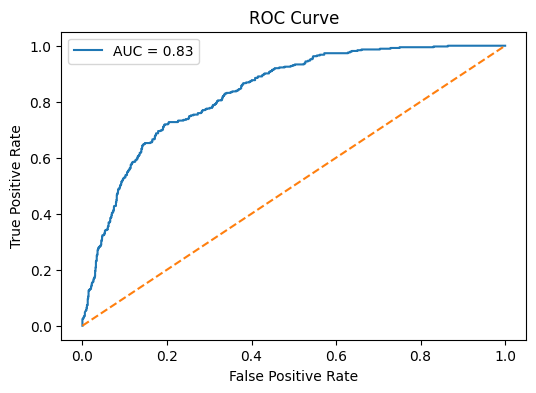

In [20]:

fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [22]:
threshold = 0.3
y_pred_custom = (y_proba >= threshold).astype(int)

print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1033
           1       0.50      0.77      0.60       374

    accuracy                           0.73      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.79      0.73      0.74      1407

